In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path as osp

import torch
from torch_geometric.data import Data, Dataset
from torch_geometric.loader import NeighborLoader
import torch_geometric.transforms as T

# load air, tube and co2 data

In [4]:
df_all = pd.read_csv('./data/raw/data_air.csv')  
df_air = df_all[df_all['Block Name']=='internalMesh']
df_air.head()

df_tube_all = pd.read_csv('./data/raw/data_tube.csv')  
df_tube = df_tube_all[df_tube_all['Block Name']=='internalMesh']
df_tube.head()

df_all_co2 = pd.read_csv('./data/raw/data_co2.csv')  
df_co2 = df_all_co2[df_all_co2['Block Name']=='internalMesh']
df_co2.head()

,Block Name,Point ID,Points_0,Points_1,Points_2,Points_Magnitude,T,U_0,U_1,U_2,U_Magnitude,alphat,epsilon,k,nut,p,p_rgh,rho
0,internalMesh,0,-0.01790,-0.0025,-0.01,0.020656,323.467,0.05,0.0,0.0,0.05,0.045337,11.828200,0.099985,0.045,100000.0,100000,1.07935
1,internalMesh,1,-0.01432,-0.0025,-0.01,0.017644,301.885,0.00,0.0,0.0,0.00,0.000000,5.107810,0.036528,0.000,100000.0,100000,1.15139
2,internalMesh,2,-0.01074,-0.0025,-0.01,0.014886,301.808,0.00,0.0,0.0,0.00,0.000000,2.728490,0.024049,0.000,100000.0,100000,1.15168
3,internalMesh,3,-0.00716,-0.0025,-0.01,0.012550,301.708,0.00,0.0,0.0,0.00,0.000000,1.621010,0.016987,0.000,100000.0,100000,1.15206
4,internalMesh,4,-0.00358,-0.0025,-0.01,0.010912,301.600,0.00,0.0,0.0,0.00,0.000000,0.997268,0.012280,0.000,100000.0,100000,1.15247


# some plots

/tmp/ipykernel_1734835/3052307317.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


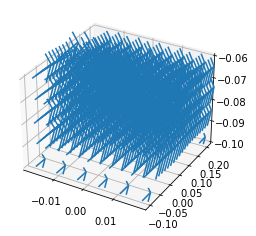

In [70]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

n_points = 1000
ax.quiver(df_air['Points_0'][0:n_points], df_air['Points_1'][0:n_points], df_air['Points_2'][0:n_points], df_air['U_0'][0:n_points], df_air['U_1'][0:n_points], df_air['U_2'][0:n_points], length=0.3)

plt.show()

/tmp/ipykernel_1744547/2008250716.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


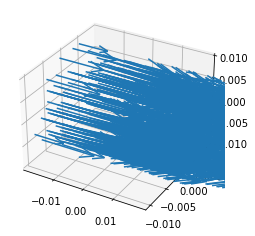

In [8]:
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

n_points = 1000
ax.quiver(df_co2['Points_0'][0:n_points], df_co2['Points_1'][0:n_points], df_co2['Points_2'][0:n_points], df_co2['U_0'][0:n_points], df_co2['U_1'][0:n_points], df_co2['U_2'][0:n_points], length=0.3)

plt.show()

(-0.01, 0.02)

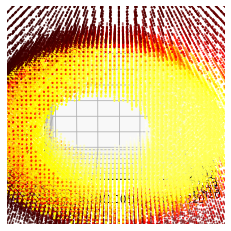

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=10., azim=0)
cmhot = plt.cm.get_cmap("hot")
ax.scatter3D(df_air['Points_0'], df_air['Points_1'],df_air['Points_2'],c=df_air['T'], s = 1,cmap=cmhot);
#ax.scatter3D(df_co2['Points_0'], df_co2['Points_1'], df_co2['Points_2'],c=df_co2['T'],marker='^');
ax.set_xlim(-0.01,0.02)
ax.set_ylim(-0.01,0.02)
ax.set_zlim(-0.01,0.02)

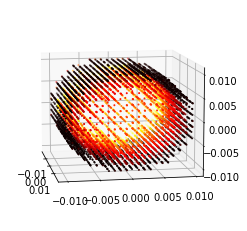

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=10., azim=-10)
cmhot = plt.cm.get_cmap("hot")
ax.scatter3D(df_co2['Points_0'], df_co2['Points_1'], df_co2['Points_2'],c=df_co2['T'], s = 1,cmap=cmhot);

In [ ]:
print('tube goes from', np.min(df_tube['Points_2']), 'to',np.max(df_tube['Points_2']))
print('co2 goes from', np.min(df_co2['Points_2']), 'to',np.max(df_co2['Points_2']))
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=-3., azim=180)
cmhot = plt.cm.get_cmap("hot")
ax.scatter3D(df_tube['Points_0'], df_tube['Points_1'], df_tube['Points_2'],c=df_tube['T'], s = 1,cmap=cmhot);
ax.scatter3D(df_co2['Points_0'], df_co2['Points_1'], df_co2['Points_2'], s = 1,cmap='Greys_r');

(-0.025, 0.025)

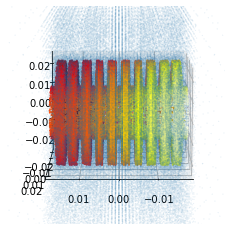

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(elev=10, azim=90)
cmhot = plt.cm.get_cmap("hot")
ax.scatter3D(df_tube['Points_0'], df_tube['Points_1'], df_tube['Points_2'],c=df_tube['T'], s = 1,cmap=cmhot);
#ax.scatter3D(df_co2['Points_0'], df_co2['Points_1'], df_co2['Points_2'], s = 1,cmap='Greys_r');
ax.scatter3D(df_air['Points_0'], df_air['Points_1'], df_air['Points_2'], s = 0.005,cmap='Blues',alpha = 0.5);
ax.set_xlim(-0.0179 ,0.0179 )
ax.set_ylim(-0.025,0.0246875)
ax.set_zlim(-0.025,0.025)

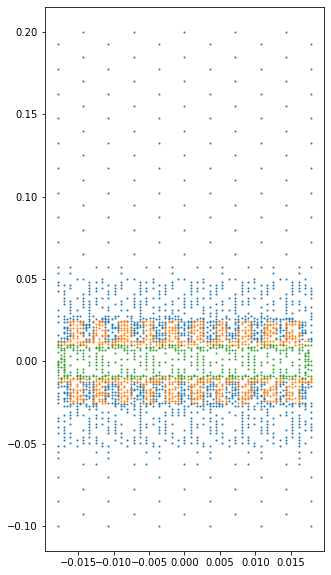

In [13]:
df_z0 = df_air[df_air['Points_2'].between(-0.001, 0.001)]
df_tube_z0 = df_tube[df_tube['Points_2'].between(-0.001, 0.001)]
df_co2_z0 = df_co2[df_co2['Points_2'].between(-0.001, 0.001)]
fig = plt.figure(figsize=(5,10))
plt.scatter(df_z0['Points_0'],df_z0['Points_1'],s=1)
plt.scatter(df_tube_z0['Points_0'],df_tube_z0['Points_1'],s=1)
plt.scatter(df_co2_z0['Points_0'],df_co2_z0['Points_1'],s=1)

In [14]:
print('tube goes from', np.min(df_tube['Points_0']), 'to',np.max(df_tube['Points_0']))
print('tube goes from', np.min(df_tube['Points_1']), 'to',np.max(df_tube['Points_1']))
print('tube goes from', np.min(df_tube['Points_2']), 'to',np.max(df_tube['Points_2']))

print('air goes from', np.min(df_air['Points_0']), 'to',np.max(df_air['Points_0']))
print('air goes from', np.min(df_air['Points_1']), 'to',np.max(df_air['Points_1']))
print('air goes from', np.min(df_air['Points_2']), 'to',np.max(df_air['Points_2']))

tube goes from -0.0179 to 0.0179
tube goes from -0.025 to 0.0246875
tube goes from -0.025 to 0.025
air goes from -0.0179 to 0.0179
air goes from -0.1 to 0.2
air goes from -0.1 to 0.1


# Unify all datasets in 1 

In [13]:
knn_func = T.KNNGraph(k=6)


In [12]:
#import networkx as nx
#import torch_geometric
#g = torch_geometric.utils.to_networkx(data_air_preprocessed)
#nx.draw(g)

In [27]:
def raw_to_graph():
    df_all = pd.read_csv('./data/raw/data_air.csv')  
    df_air = df_all[df_all['Block Name']=='internalMesh'].iloc[::2]
    df_air.head()

    df_tube_all = pd.read_csv('./data/raw/data_tube.csv')  
    df_tube = df_tube_all[df_tube_all['Block Name']=='internalMesh'].iloc[::2]
    df_tube.head()

    df_all_co2 = pd.read_csv('./data/raw/data_co2.csv')  
    df_co2 = df_all_co2[df_all_co2['Block Name']=='internalMesh'].iloc[::2]
    df_co2.head()
    ##########################################
    df_air['Block Name'] = 0
    df_air['T_start'] = np.min(df_air['T'])
    df_air['P_start'] = 1e5
    ##########################################
    df_co2['Block Name'] = 1
    df_co2['T_start'] = np.max(df_co2['T'])
    df_co2['P_start'] = np.max(df_co2['p'])
    ##########################################
    df_tube['Block Name'] = 2
    df_tube['T_start'] = np.max(df_tube['T'])  #todo 
    df_tube['U_0'] = 0 # give tube 0 velocity
    df_tube['U_1'] = 0  
    df_tube['U_2'] = 0  
    df_tube['P_start'] = 1e5
    n_points  = len(df_air)
    x_air = torch.Tensor(df_air[['U_0','U_1','U_2','T_start','Block Name','P_start']][0:n_points].to_numpy())
    y_air = torch.Tensor(df_air[['T']][0:n_points].to_numpy())
    pos_air = torch.Tensor(df_air[['Points_0','Points_1','Points_2']][0:n_points].to_numpy())
    x_co2 = torch.Tensor(df_co2[['U_0','U_1','U_2','T_start','Block Name','P_start']][0:n_points].to_numpy())
    y_co2 = torch.Tensor(df_co2[['T']][0:n_points].to_numpy())
    pos_co2 = torch.Tensor(df_co2[['Points_0','Points_1','Points_2']][0:n_points].to_numpy())
    x_tube = torch.Tensor(df_tube[['U_0','U_1','U_2','T_start','Block Name','P_start']][0:n_points].to_numpy())
    y_tube = torch.Tensor(df_tube[['T']][0:n_points].to_numpy())
    pos_tube = torch.Tensor(df_tube[['Points_0','Points_1','Points_2']][0:n_points].to_numpy())


    x_air_tube = torch.concat([x_air,x_tube],dim=0)
    pos_air_tube = torch.concat([pos_air,pos_tube],dim=0)
    y_air_tube = torch.concat([y_air,y_tube],dim=0)
    data_air_tube = Data(x = x_air_tube, edge_index = None, pos = pos_air_tube, y = y_air_tube)

    data_air_tube_preprocessed = knn_func(data_air_tube)


    x_tube_co2 = torch.concat([x_tube,x_co2],dim=0)
    pos_tube_co2 = torch.concat([pos_tube,pos_co2],dim=0)
    y_tube_co2 = torch.concat([y_tube,y_co2],dim=0)
    data_tube_co2= Data(x = x_tube_co2, edge_index = None, pos = pos_tube_co2, y = y_tube_co2)
    data_tube_co2_preprocessed = knn_func(data_tube_co2)

    edge_index_two_graphs = torch.concat([data_air_tube_preprocessed.edge_index, data_tube_co2_preprocessed.edge_index+x_air.shape[0] ],dim=1)
    x_air_tube_co2 = torch.concat([x_air,x_tube,x_co2],dim=0)
    pos_air_tube_co2 = torch.concat([pos_air,pos_tube,pos_co2],dim=0)
    y_air_tube_co2 = torch.concat([y_air,y_tube,y_co2],dim=0)
    data_air_tube_co2 = Data(x = x_air_tube_co2, edge_index = edge_index_two_graphs, pos = pos_air_tube_co2, y = y_air_tube_co2)
    return data_air_tube_co2

In [28]:
#g = torch_geometric.utils.to_networkx(data_air_tube_co2)
#nx.draw(g,node_color=data_air_tube_co2.x[:,4], with_labels=True)

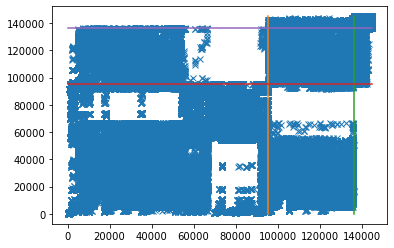

In [91]:
%matplotlib inline
plt.figure()
plt.plot(edge_index_two_graphs[0,:],edge_index_two_graphs[1,:],'x')
plt.plot(len(df_air)*np.ones((100,1)),np.linspace(1,len(df_air)+len(df_tube)+len(df_co2),100))
plt.plot((len(df_air)+len(df_tube))*np.ones((100,1)),np.linspace(1,len(df_air)+len(df_tube)+len(df_co2),100))
plt.plot(np.linspace(1,len(df_air)+len(df_tube)+len(df_co2),100),len(df_air)*np.ones((100,1)))
plt.plot(np.linspace(1,len(df_air)+len(df_tube)+len(df_co2),100),(len(df_air)+len(df_tube))*np.ones((100,1)))


In [31]:
class CFD_dataset(Dataset):
    def __init__(self, root, local_neighborhood = 0.01, transform=None, pre_filter=None, train_frac=0.8):
        self.pre_transform=T.RadiusGraph(local_neighborhood)
        self.root = root
        self.train_frac = train_frac
        super().__init__(root, transform, self.pre_transform, pre_filter)

    @property
    def raw_file_names(self):
        return ['data_air.csv']

    @property
    def processed_file_names(self):
        return ['data_air1.pt']

    def process(self):
        torch.manual_seed(0)
        for idx, raw_path in enumerate(self.raw_paths):
            data = raw_to_graph()
            # set training mask
            data.train_mask = torch.rand(data.num_nodes) < self.train_frac
            torch.save(data, osp.join(self.processed_dir, f'data_{idx}.pt'))
            idx += 1

    def len(self):
        return len(self.processed_file_names)

    def get(self, idx):
        data = torch.load(osp.join(self.processed_dir, f'data_{idx}.pt'))
        return data

In [32]:
dataset = CFD_dataset('./data/')
dataset.out_features = 1
data = dataset[0]

Processing...
Done!


In [33]:
train_loader = NeighborLoader(
    data,
    num_neighbors=[4]*6,
    batch_size=128,
    input_nodes=data.train_mask,
)
test_loader = NeighborLoader(
    data,
    num_neighbors=[4]*6,
    batch_size=128,
    shuffle=False,
    input_nodes=~data.train_mask,
)


In [34]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels=128, hidden_layers=3):
        super().__init__()
        self.layers = [GCNConv(data.num_features, hidden_channels, cached=False)]
        for _ in range(hidden_layers - 1):
            self.layers.append(GCNConv(hidden_channels, hidden_channels, cached=False))
        self.layers = torch.nn.ModuleList(self.layers)
        
        self.regressor = torch.nn.Sequential(
            torch.nn.Linear(hidden_channels, hidden_channels),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(hidden_channels, hidden_channels),
            torch.nn.LeakyReLU(),
            torch.nn.Linear(hidden_channels, 1),
        )

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        for layer in self.layers:
            x = layer(x, edge_index)
            x = F.relu(x)
        x = self.regressor(x)
        return x

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [36]:
model = GCN(256, 4).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)#, weight_decay=5e-4)

In [37]:
# useful function for computing accuracy
import torch.nn as nn
loss_mse = nn.MSELoss()
def compute_mse(pred_y, y):
    return loss_mse(pred_y,y)

In [38]:
from tqdm import trange
# train the model
model.train()
losses_train = []
losses_val = []

EPOCHS = 100
pbar = trange(len(train_loader) * EPOCHS, desc='Training')
for epoch in range(EPOCHS):
    for i, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = loss_mse(out, data.y)
        losses_train.append(loss.item())
        loss.backward()
        optimizer.step()
        # validation step
        if i % 20 == 0:
            model.eval()
            with torch.no_grad():
                for data in test_loader:
                    data = data.to(device)
                    out = model(data)
                    loss_val = compute_mse(out, data.y)
                    losses_val.append(loss_val.item())
            model.train()

        pbar.update(1)
        pbar.set_description(f'Epoch {epoch + 1:03d}| Loss train: {loss.item():.4f}, Loss val: {loss_val.item():.4f}')



Training:   0%|                                                                              | 0/181200 [01:59<?, ?it/s]

Training:   0%|                                                                  | 1/90700 [00:53<1341:12:21, 53.23s/it]
Epoch 001| Loss train: 7118.8330, Loss val: 3975922.2500:   0%|                  | 1/90700 [00:53<1341:12:21, 53.23s/it]
Epoch 001| Loss train: 3101997.0000, Loss val: 3975922.2500:   0%|               | 2/90700 [00:53<1341:11:28, 53.23s/it]
Epoch 001| Loss train: 204481.9844, Loss val: 3975922.2500:   0%|                | 3/90700 [00:53<1341:10:34, 53.23s/it]
Epoch 001| Loss train: 204481.9844, Loss val: 3975922.2500:   0%|                 | 4/90700 [00:53<254:42:06, 10.11s/it]
Epoch 001| Loss train: 147785.0938, Loss val: 3975922.2500:   0%|                 | 4/90700 [00:53<254:42:06, 10.11s/it]
Epoch 001| Loss train: 247084.9375, Loss val: 3975922.2500:   0%|                 | 5/90700 [00:53<254:41:56, 10.11s/it]
Epoch 001| Loss train: 53978.8

KeyboardInterrupt: 

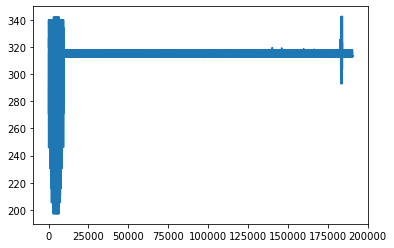

In [ ]:
plt.plot(out.detach().numpy())

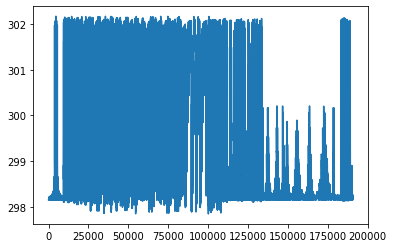

In [ ]:
plt.plot(data.y.detach().numpy())